<a href="https://colab.research.google.com/github/homata123/machine-learning/blob/master/GAN_for_VNCeleb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/nageshsinghc4/Face-generation-GAN.git


Cloning into 'Face-generation-GAN'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 66 (delta 30), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (66/66), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
cd /content/gdrive/My Drive/Kaggle

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Kaggle'
/content


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [ ]:
#!kaggle competitions download -c generative-dog-images
!kaggle datasets download -d homata123/vnceleb

 99% 631M/638M [00:04<00:00, 139MB/s]
100% 638M/638M [00:04<00:00, 148MB/s]


In [ ]:
!unzip vnceleb.zip

Streaming output truncated to the last 5000 lines.
  inflating: VN-celeb/785/21.png     
  inflating: VN-celeb/785/22.png     
  inflating: VN-celeb/785/23.png     
  inflating: VN-celeb/785/24.png     
  inflating: VN-celeb/785/25.png     
  inflating: VN-celeb/785/26.png     
  inflating: VN-celeb/785/27.png     
  inflating: VN-celeb/785/28.png     
  inflating: VN-celeb/785/29.png     
  inflating: VN-celeb/785/3.png      
  inflating: VN-celeb/785/30.png     
  inflating: VN-celeb/785/4.png      
  inflating: VN-celeb/785/5.png      
  inflating: VN-celeb/785/6.png      
  inflating: VN-celeb/785/7.png      
  inflating: VN-celeb/785/8.png      
  inflating: VN-celeb/785/9.png      
  inflating: VN-celeb/786/0.png      
  inflating: VN-celeb/786/1.png      
  inflating: VN-celeb/786/10.png     
  inflating: VN-celeb/786/11.png     
  inflating: VN-celeb/786/2.png      
  inflating: VN-celeb/786/3.png      
  inflating: VN-celeb/786/4.png      
  inflating: VN-celeb/786/5.png      

100%|██████████| 19/19 [00:00<00:00, 408.65it/s]


(2202, 128, 128, 3)


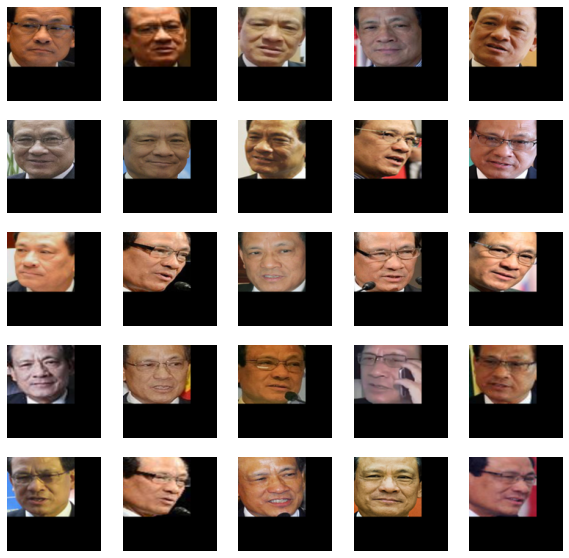

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


50/1000: d_loss: 0.5367,  a_loss: 0.6691.  (3.9 sec)
100/1000: d_loss: 0.9566,  a_loss: 1.4036.  (4.2 sec)
150/1000: d_loss: 1.0529,  a_loss: 0.7348.  (4.5 sec)
200/1000: d_loss: 0.7281,  a_loss: 0.7138.  (3.6 sec)
250/1000: d_loss: 0.3957,  a_loss: 1.6856.  (4.4 sec)
300/1000: d_loss: 0.5682,  a_loss: 2.4863.  (4.0 sec)
350/1000: d_loss: 0.9985,  a_loss: 1.2161.  (4.3 sec)
400/1000: d_loss: 0.5290,  a_loss: 6.1430.  (3.6 sec)
450/1000: d_loss: 0.3719,  a_loss: 1.0460.  (3.7 sec)
500/1000: d_loss: 0.5977,  a_loss: 1.0782.  (3.5 sec)
550/1000: d_loss: 0.8331,  a_loss: 1.3444.  (3.5 sec)
600/1000: d_loss: 0.4561,  a_loss: 1.3232.  (3.9 sec)
650/1000: d_loss: 0.7298,  a_loss: 0.7954.  (3.7 sec)
700/1000: d_loss: 0.5322,  a_loss: 0.9245.  (4.0 sec)
750/1000: d_loss: 0.6104,  a_loss: 1.0103.  (4.1 sec)
800/1000: d_loss: 0.8975,  a_loss: 0.7723.  (3.9 sec)
850/1000: d_loss: 0.6520,  a_loss: 0.7356.  (3.4 sec)
900/1000: d_loss: 0.3248,  a_loss: 1.8041.  (4.1 sec)
950/1000: d_loss: 0.7581,  a_

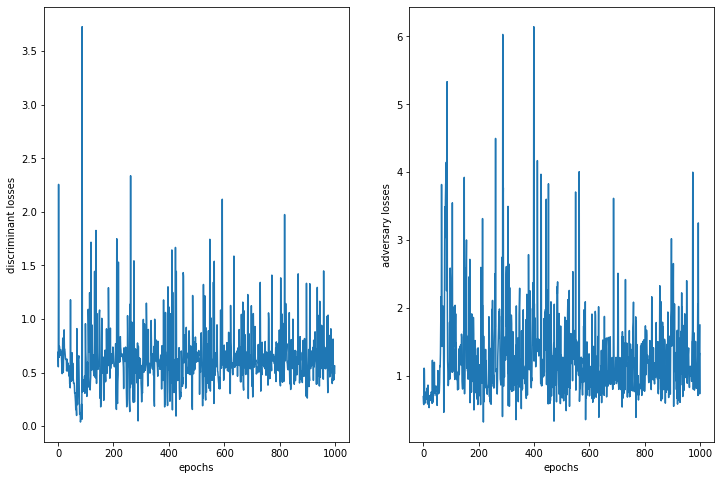

In [ ]:
import numpy as np
import pandas as pd
import os
from DiffAugment_pytorch import DiffAugment

PIC_DIR = f'VN-celeb/'
    
from tqdm import tqdm
from PIL import Image

IMAGES_COUNT = 30

ORIG_WIDTH = 178
ORIG_HEIGHT = 208
diff = (ORIG_HEIGHT - ORIG_WIDTH) // 2

WIDTH = 128
HEIGHT = 128

crop_rect = (0, diff, ORIG_WIDTH, ORIG_HEIGHT - diff)

images = []
for fold in os.listdir(PIC_DIR)[:IMAGES_COUNT]:
  #for pic_file in tqdm(os.listdir(PIC_DIR)[:IMAGES_COUNT]):
  fold1=os.path.join(PIC_DIR,fold)
  for pic_file in tqdm(os.listdir(fold1)):
      fold2=os.path.join(fold1,pic_file)
      pic = Image.open(fold2).crop(crop_rect)
      pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)
      images.append(np.uint8(pic))




images = np.array(images) / 255
print(images.shape)


from matplotlib import pyplot as plt


#Code cell <XJuaS7xBEd4C>
# %% [code]

plt.figure(1, figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


#Code cell <V8Qq_kWLEeaG>
# %% [code]

from keras import Input
from keras.layers import Dense, Reshape, LeakyReLU, Conv2D, Conv2DTranspose, Flatten, Dropout
from keras.models import Model
from keras.optimizers import RMSprop

LATENT_DIM = 32
CHANNELS = 3


#Code cell <m1NzuOZ4EkZ->
# %% [code]

def create_generator():
    gen_input = Input(shape=(LATENT_DIM, ))

    x = Dense(128 * 16 * 16)(gen_input)
    x = LeakyReLU()(x)
    x = Reshape((16, 16, 128))(x)

    x = Conv2D(256, 5, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(CHANNELS, 7, activation='tanh', padding='same')(x)

    generator = Model(gen_input, x)
    return generator

def create_discriminator():
    disc_input = Input(shape=(HEIGHT, WIDTH, CHANNELS))

    x = Conv2D(256, 3)(disc_input)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Flatten()(x)
    x = Dropout(0.4)(x)

    x = Dense(1, activation='sigmoid')(x)
    discriminator = Model(disc_input, x)

    optimizer = RMSprop(
        lr=.0001,
        clipvalue=1.0,
        decay=1e-8
    )

    discriminator.compile(
        optimizer=optimizer,
        loss='binary_crossentropy'
    )

    return discriminator



generator = create_generator()
discriminator = create_discriminator()
discriminator.trainable = False


#Code cell <z_j5727aEqV_>
# %% [code]

gan_input = Input(shape=(LATENT_DIM, ))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)

optimizer = RMSprop(lr=.0001, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=optimizer, loss='binary_crossentropy')



#Code cell <PKTtwEbbEyL2>
# %% [code]

import time
iters = 200
batch_size = 15

RES_DIR = 'res2'
FILE_PATH = '%s/generated_%d.png'
if not os.path.isdir(RES_DIR):
    os.mkdir(RES_DIR)

CONTROL_SIZE_SQRT = 6
control_vectors = np.random.normal(size=(CONTROL_SIZE_SQRT**2, LATENT_DIM)) / 2

start = 0
d_losses = []
a_losses = []
images_saved = 0
for step in range(iters):
    start_time = time.time()
    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    generated = generator.predict(latent_vectors)

    real = images[start:start + batch_size]
    combined_images = np.concatenate([generated, real])

    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    labels += .05 * np.random.random(labels.shape)

    d_loss = discriminator.train_on_batch(combined_images, labels)
    d_losses.append(d_loss)

    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    misleading_targets = np.zeros((batch_size, 1))

    a_loss = gan.train_on_batch(latent_vectors, misleading_targets)
    a_losses.append(a_loss)

    start += batch_size
    if start > images.shape[0] - batch_size:
        start = 0

    if step % 10 == 9:
        gan.save_weights('./drive/My Drive/gan.h5')

        print('%d/%d: d_loss: %.4f,  a_loss: %.4f.  (%.1f sec)' % (step + 1, iters, d_loss, a_loss, time.time() - start_time))

        control_image = np.zeros((WIDTH * CONTROL_SIZE_SQRT, HEIGHT * CONTROL_SIZE_SQRT, CHANNELS))
        control_generated = generator.predict(control_vectors)
        for i in range(CONTROL_SIZE_SQRT ** 2):
            x_off = i % CONTROL_SIZE_SQRT
            y_off = i // CONTROL_SIZE_SQRT
            control_image[x_off * WIDTH:(x_off + 1) * WIDTH, y_off * HEIGHT:(y_off + 1) * HEIGHT, :] = control_generated[i, :, :, :]
        im = Image.fromarray(np.uint8(control_image * 255))
        im.save(FILE_PATH % (RES_DIR, images_saved))
        images_saved += 1


plt.figure(1, figsize=(12, 8))
plt.subplot(121)
plt.plot(d_losses)
plt.xlabel('epochs')
plt.ylabel('discriminant losses')
plt.subplot(122)
plt.plot(a_losses)
plt.xlabel('epochs')
plt.ylabel('adversary losses')
plt.show()

import imageio
import shutil

images_to_gif = []
for filename in os.listdir(RES_DIR):
    images_to_gif.append(imageio.imread(RES_DIR + '/' + filename))
imageio.mimsave('drive/My Drive/visual.gif', images_to_gif)
shutil.rmtree(RES_DIR)